# Tutorial for Cy-RSoXS v1.1.4.0

Cy-RSoXS is a voxel-based forward-scattering simulator calculated in the Born Approximation. This is a tutorial that goes through how to create a morphology, run the simulation (with slurm specific instructions), and analyze the resulting simulated scattering patterns

#### Components of a Cy-RSoXS simulation

- **Morphology file**
    - .hdf5 format
- **Material optical constant files**
    - Material1.txt, Material2.txt, Material3.txt, etc.
- **Configuration file**
    - config.txt
- **Slurm file** (optional)
    - job.slurm

### Morphology File Structure

Cy-RSoXS accepts two different types of morphologies: Vector and Euler. A vector morphology will use a vector to assign the direction and amount of alignment in each voxel for each material. A Euler morphology will use a set of Euler angles to assign the direction of alignment. A separate S parameter is used to denote the amount of alignment in each voxel for each material.

The two structures below assume a morphology of size [1, 256, 256] where the dimensions are [Z, Y, X], and two materials in the morphology.

**Vector Morphology hdf5 Structure**
***
```
Vector_Morphology/  
    Mat_1_alignment/   
        data = alignment vector array of shape [1, 256, 256, 3] and order [Z, Y, X, (XYZ)]
            dims = ['Z', 'Y', 'X']
    Mat_1_unaligned/
        data = volume fraction array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']
    Mat_2_alignment/   
        data = alignment vector array of shape [1, 256, 256, 3] and order [Z, Y, X, (XYZ)]
            dims = ['Z', 'Y', 'X']
    Mat_2_unaligned/
        data = volume fraction array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']

Morphology_Parameters/
*required*
    PhysSize/
        data = size of each voxel edge in nanometers
    NumMaterial/
        data = number of materials in morphology (integer)
*optional*
    creation_date/
        data = date and time
    film_normal/
        data = [Z, Y, X] vector denoting the film normal direction
    morphology_creator/
        data = author of the morphology
    name/
        data = name of morphology
```


**Euler Morphology hdf5 Structure**  
The Euler Morphology uses a ZYZ convention. Currently, Cy-RSoXS only supports uniaxial materials and the first Euler rotation (Phi) is unused. Theta is the rotation around the Y axis. Psi is the last rotation around the Z axis.

![Eulergif](Euler_ZYZ-v4.gif "segment")

***
```
Euler_Angles/
    Mat_1_Vfrac/
        data = Rotation angle array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']
    Mat_1_S/   
        data = alignment magnitude array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']
    Mat_1_Theta/
        data = Rotation angle array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']
    Mat_1_Psi/
        data = Rotation angle array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']

    Mat_2_Vfrac/
        data = Rotation angle array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']
    Mat_2_S/   
        data = alignment magnitude array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']
    Mat_2_Theta/
        data = Rotation angle array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']
    Mat_2_Psi/
        data = Rotation angle array of shape [1, 256, 256] and order [Z, Y, X]
            dims = ['Z', 'Y', 'X']

Morphology Parameters/
*required*
    PhysSize/
        data = size of each voxel edge in nanometers
    NumMaterial/
        data = number of materials in morphology (integer)
*optional*
    creation_date/
        data = date and time
    film_normal/
        data = [Z, Y, X] vector denoting the film normal direction
    morphology_creator/
        data = author of the morphology
    name/
        data = name of morphology
```

### Material Optical Constant File Structure

For each material in the simulation, we need a corresponding MaterialX.txt file which contains the optical constants at each energy

**Material.txt file structure**  
For each energy simulated, we record the energy and the optical constant values for the extraordinary (Para) and ordinary (Perp) axes of the uniaxial dielectric function
***
```
EnergyData0:
{
Energy = 275.0;
BetaPara = 6.388392448251455e-05;
BetaPerp = 6.303899730113871e-05;
DeltaPara = 0.0010635346640931634;
DeltaPerp = 0.0011221433414215483;
}

EnergyData1:
{
Energy = 275.1;
BetaPara = 6.309144102259152e-05;
BetaPerp = 6.304376809350212e-05;
DeltaPara = 0.0010567115883113286;
DeltaPerp = 0.0011157664852560843;
}

.
.
.

EnergyData249:
{
Energy = 299.9;
BetaPara = 0.0024365306249853557;
BetaPerp = 0.0025455166691934236;
DeltaPara = 0.0017547293997892883;
DeltaPerp = 0.001774225207859871;
}
```

### Config.txt File Structure

**Config.txt entry**
***
```
Energies = [Energy0, Energy1, Energy2, ..., EnergyN];
CaseType = 0
EAngleRotation = [StartAngle, AngleIncrement, EndAngle];
MorphologyType = 0 for Euler morphology, 1 for Vector morphology

*refer to CyRSoXS-Manual for optional entries

```

### Slurm File

**job.slurm file structure**  
This is the standard job.slurm file structure. The things to change in here for the NISTers are the \<cyrsoxs version\> and the Morphology file name
```
#!/bin/bash -l
#SBATCH --job-name=CYRSOXS      # Job name
#SBATCH --output=cyrsoxs.%j.out # Stdout (%j expands to jobId)
#SBATCH --error=cyrsoxs.%j.out  # Stderr (%j expands to jobId)
#SBATCH --time=04:00:00         # walltime
#SBATCH --nodes=1               # Number of nodes requested (only one node on glados)
#SBATCH --ntasks=1              # Number of tasks(processes) (tasks distributed across nodes)
#SBATCH --ntasks-per-node=1     # Tasks per node
#SBATCH --cpus-per-task=1       # Threads per task (all cpus will be on same node)
#SBATCH --gres=gpu:turing:1     # number and type of GPUS to use (glados only has turing)
#SBATCH --gres-flags=enforce-binding
#SBATCH --partition=gpu

set -e

if [ x$SLURM_CPUS_PER_TASK == x ]; then
    export OMP_NUM_THREADS=1
else
    export OMP_NUM_THREADS=$SLURM_CPUS_PER_TASK
fi

# load necessary modules
source ~/.typyEnv CLEAN
typyEnv --add cyrsoxs/<cyrsoxs version>

## RUN YOUR PROGRAM ##
echo "RUNNING ON GPU"${CUDA_VISIBLE_DEVICES}
srun CyRSoXS MorphologyFile.hdf5
```

### Core-Shell Disk Morphology

In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pathlib

In [3]:
basePath = pathlib.Path('.').absolute()

In [5]:
sys.path.append('/home/pdudenas/lib/NRSS/')

In [8]:
from NRSS.writer import write_materials, write_hdf5, write_config, write_slurm

In [9]:
energies = np.round(np.arange(275,300,0.1),1)

In [10]:
energies

array([275. , 275.1, 275.2, 275.3, 275.4, 275.5, 275.6, 275.7, 275.8,
       275.9, 276. , 276.1, 276.2, 276.3, 276.4, 276.5, 276.6, 276.7,
       276.8, 276.9, 277. , 277.1, 277.2, 277.3, 277.4, 277.5, 277.6,
       277.7, 277.8, 277.9, 278. , 278.1, 278.2, 278.3, 278.4, 278.5,
       278.6, 278.7, 278.8, 278.9, 279. , 279.1, 279.2, 279.3, 279.4,
       279.5, 279.6, 279.7, 279.8, 279.9, 280. , 280.1, 280.2, 280.3,
       280.4, 280.5, 280.6, 280.7, 280.8, 280.9, 281. , 281.1, 281.2,
       281.3, 281.4, 281.5, 281.6, 281.7, 281.8, 281.9, 282. , 282.1,
       282.2, 282.3, 282.4, 282.5, 282.6, 282.7, 282.8, 282.9, 283. ,
       283.1, 283.2, 283.3, 283.4, 283.5, 283.6, 283.7, 283.8, 283.9,
       284. , 284.1, 284.2, 284.3, 284.4, 284.5, 284.6, 284.7, 284.8,
       284.9, 285. , 285.1, 285.2, 285.3, 285.4, 285.5, 285.6, 285.7,
       285.8, 285.9, 286. , 286.1, 286.2, 286.3, 286.4, 286.5, 286.6,
       286.7, 286.8, 286.9, 287. , 287.1, 287.2, 287.3, 287.4, 287.5,
       287.6, 287.7,

In [11]:
x = np.arange(0,512)
y = x.copy()
xx, yy = np.meshgrid(x,y)

In [12]:
x_center = xx.shape[0]//2
y_center = xx.shape[0]//2
radius = 10
shell = 5
core_idx = ((xx-x_center)**2 + (yy-y_center)**2 < radius**2)
shell_idx = ((xx-x_center)**2 + (yy-y_center)**2 >= radius**2) & ((xx-x_center)**2 + (yy-y_center)**2 < (radius+shell)**2)
phi_material1 = np.zeros(xx.shape)
phi_material1[core_idx] = 1
shell_material = np.zeros(xx.shape)
shell_material[shell_idx] = 1

combined = phi_material1 + shell_material

[{(231.0, 281.0)}, {(231.0, 281.0)}]

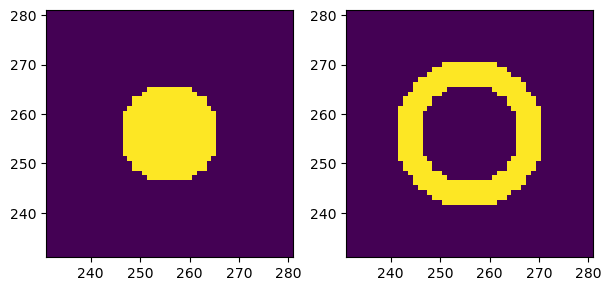

In [13]:
window = 25
fig, ax = plt.subplots(1,2,figsize=(6,3),constrained_layout=True)
ax[0].imshow(phi_material1)
ax[1].imshow(shell_material)
[{axes.set_xlim(x_center-window,x_center+window), axes.set_ylim(y_center-window,y_center+window)} for axes in ax]

In [14]:
from skimage.filters import sobel_v, sobel_h, sobel, gaussian

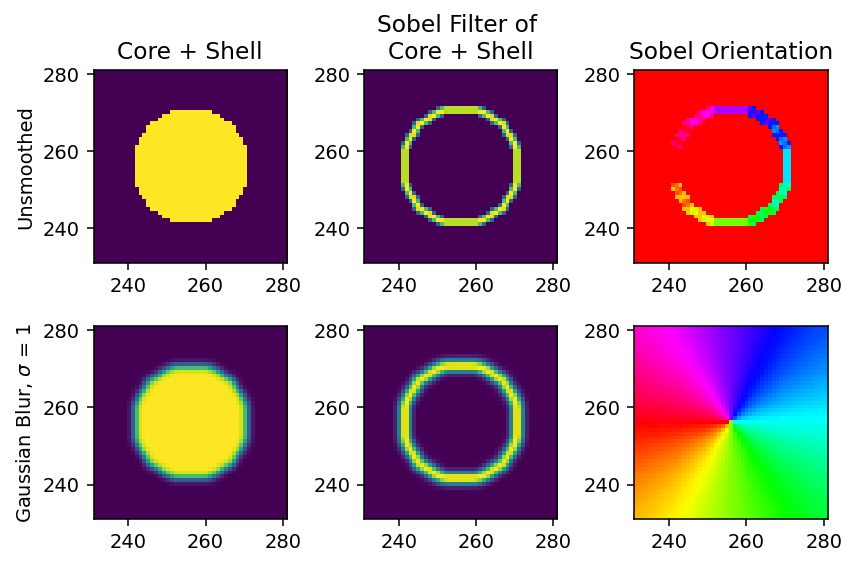

In [15]:
angles = np.arctan2(-sobel_h(combined),-sobel_v(combined))
angles_smoothed = np.arctan2(-sobel_h(gaussian(combined,sigma=5)),-sobel_v(gaussian(combined,sigma=5)))

fig, ax = plt.subplots(2,3,dpi=140,figsize=(6,4),constrained_layout=True)
ax = ax.flatten()
ax[0].imshow(combined,origin='lower',interpolation='none')
ax[3].imshow(gaussian(combined),origin='lower',interpolation='none')
ax[1].imshow(sobel(combined),origin='lower',interpolation='none')
ax[4].imshow(sobel(gaussian(combined)),origin='lower',interpolation='none')
ax[2].imshow(angles,origin='lower',cmap='hsv',interpolation='none')
ax[5].imshow(angles_smoothed,origin='lower',cmap='hsv',interpolation='none')
ax[0].set_ylabel('Unsmoothed')
ax[3].set_ylabel(r'Gaussian Blur, $\sigma$ = 1')

ax[0].set_title('Core + Shell')
ax[1].set_title('Sobel Filter of \nCore + Shell')
ax[2].set_title('Sobel Orientation')
[{axes.set_xlim(x_center-window,x_center+window), axes.set_ylim(x_center-window,x_center+window)} for axes in ax]
plt.show()

#### Notice how a gaussian blur extends the 'edge' detected by the sobel filter. This is useful for assigning orientation to a larger area

#### The sobel filters demonstrate how one might analyze an image to determine orientation at interfaces. You can also achieve this orientation field analytically using the meshgrid we made earlier

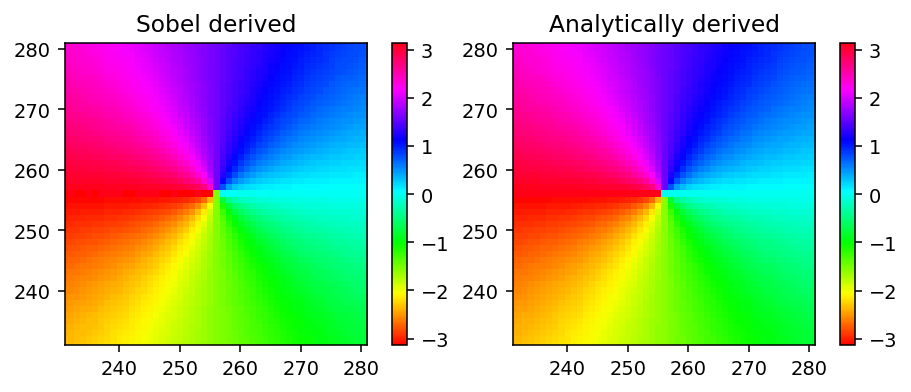

In [16]:
# Define the angle based on the meshgrid
angle_analytical = np.arctan2((yy-y_center),(xx-x_center))
fig, ax = plt.subplots(1,2,dpi=140,constrained_layout=True)
im0 = ax[0].imshow(angles_smoothed,origin='lower',cmap='hsv',interpolation='none')
im1 = ax[1].imshow(angle_analytical,cmap='hsv',origin='lower')
[{axes.set_xlim(x_center-window,x_center+window), axes.set_ylim(x_center-window,x_center+window)} for axes in ax]
ax[0].set_title('Sobel derived')
ax[1].set_title('Analytically derived')
plt.colorbar(im0,ax=ax[0],fraction=0.05, pad=0.04)
plt.colorbar(im1,ax=ax[1],fraction=0.05, pad=0.04)

In [17]:
# create Euler arrays
theta = np.zeros(xx.shape)
psi = theta.copy()

# Use Boolean indexing to only grab the orientation in the shell region
theta[shell_material.astype(bool)] = np.pi/2
psi[shell_material.astype(bool)] = angles_smoothed[shell_material.astype(bool)]


# I am bounding the orientation angles from 0 to pi for visualization, but Cy-RSoXS will accept any angle
# psi[psi > np.pi/2] %= -np.pi/2
# psi[psi < -np.pi/2] %= np.pi/2
psi = np.mod(psi,np.pi)

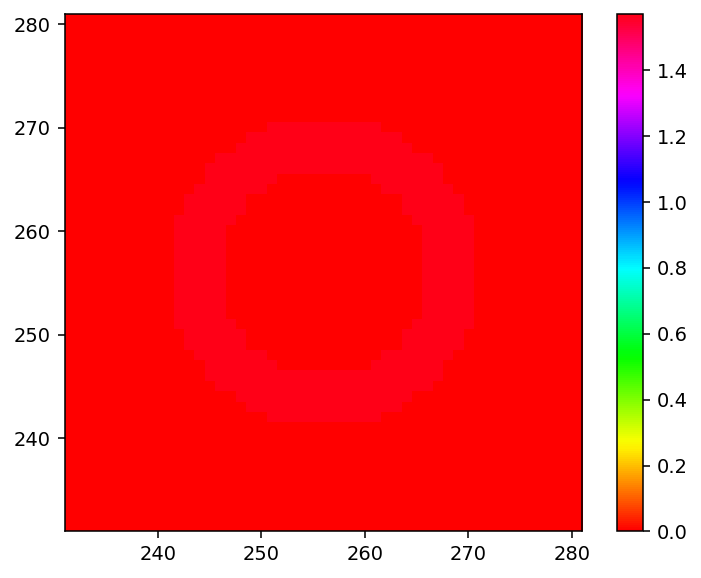

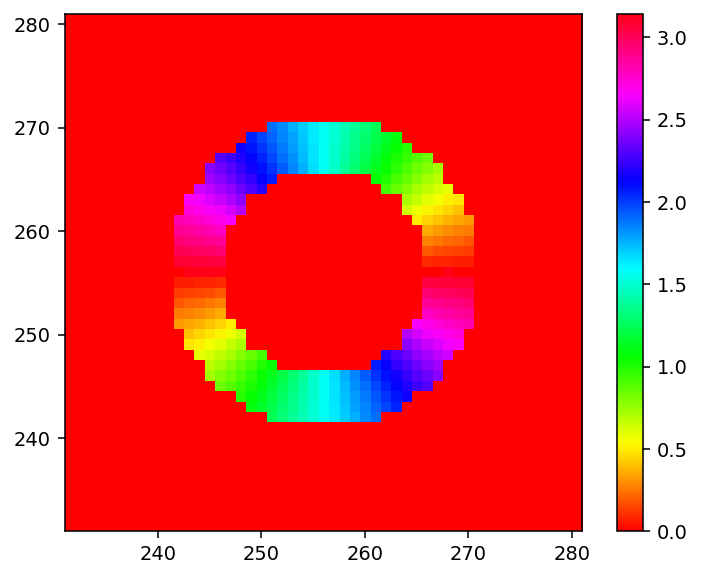

In [18]:
plt.figure(dpi=140)
plt.imshow(theta,origin='lower',cmap='hsv')
plt.colorbar()
plt.xlim(x_center-25,x_center+25)
plt.ylim(x_center-25,x_center+25)
plt.show()
plt.figure(dpi=140)
plt.imshow(psi,origin='lower',cmap='hsv')
plt.colorbar()
plt.xlim(x_center-25,x_center+25)
plt.ylim(x_center-25,x_center+25)
plt.show()

#### Now we have Euler angles for the shell. To recap, the morphology is an isotropic core of Material 1, a shell of aligned Material 1, and a matrix of Material 2. We need to correctly assign the volume fractions and alignment magnitudes (S).

In [19]:
mat1_Vfrac = combined.copy() # volume fraction of all polyethylene (core and shell)
mat1_S = shell_material.copy() # alignment magnitude for polyethylene. Only the shell is aligned.

mat2_Vfrac = np.ones(xx.shape)
mat2_Vfrac -= mat1_Vfrac # everywhere there isn't polyethylene, we have vacuum

# we have no alignment for vacuum, and leave the euler angles as all zeros
mat2_S = np.zeros(xx.shape)
mat2_theta = mat2_S.copy()
mat2_psi = mat2_S.copy()

#### Till now we have been using arrays that are (Y, X) for ease of visualization and intuition. Now we need to reshape the arrays to adopt the proper convention for Cy-RSoXS. We will reshape the arrays to be (Z, Y, X)

In [20]:
NumXY = xx.shape[0]
mat1_Vfrac = np.reshape(mat1_Vfrac,(1,NumXY,NumXY))
mat1_S = np.reshape(mat1_S,(1,NumXY,NumXY))
mat1_psi = np.reshape(psi,(1,NumXY,NumXY))
mat1_theta = np.reshape(theta,(1,NumXY,NumXY))

mat2_Vfrac = np.reshape(mat2_Vfrac,(1,NumXY,NumXY))
mat2_S = np.reshape(mat2_S,(1,NumXY,NumXY))
mat2_theta = np.reshape(mat2_theta,(1,NumXY,NumXY))
mat2_psi = np.reshape(mat2_psi,(1,NumXY,NumXY))

#### Write the morphology to HDF5

In [21]:
write_hdf5([[mat1_Vfrac, mat1_S, mat1_theta, mat1_psi], [mat2_Vfrac, mat2_S, mat2_theta, mat2_psi]], 5.0, 'CoreShell.hdf5')

--> Marking CoreShell.hdf5


'CoreShell.hdf5'

#### In the above sections the materials are purposefully referred to as "Material 1" and "Material 2". This is because *the morphology.hdf5 file contains no information about the particular material optical constants or what energies are run.* Only when we pair the morphology.hdf5 file with config.txt and the Material.txt files do we have a complete simulation.  
Below we define Material 1 to be polyethylene and Material 2 to be vacuum.

In [22]:
# PEOlig2018.txt
material_dict = {'Material1':'PEOlig2018.txt','Material2':'vacuum'}
energy_dict = {'Energy':6,'DeltaPerp':3, 'BetaPerp':1, 'DeltaPara':2, 'BetaPara':0}  

In [23]:
write_materials(energies, material_dict, energy_dict, 2)

Duplicates in Energy found. Removing it


#### The config.txt file contains information on which energies and angles to run, as well as the type of morphology (Euler or Vector). Here we are simulating the morphology rotated from 0$^\circ$ to 360$^\circ$ in 1$^\circ$ increments. The different rotations are averaged at the far field projection

In [24]:
write_config(list(energies), [0.0, 1.0, 360.0], CaseType=0, MorphologyType=0)

In [25]:
write_slurm('CoreShell.hdf5')

#### Now we run the checkh5.py function to confirm we have no errors in our morphology creation

In [26]:
from NRSS.checkH5 import checkH5

Dataset dimensions (Z, Y, X): 1 x 512 x 512
Number of Materials: 2

Material 1 Vfrac. Min: 0.0 Max: 1.0
Material 1 S. Min: 0.0 Max: 1.0
Material 1 theta. Min: 0.0 Max: 1.5707963267948966
Material 1 psi. Min: 0.0 Max: 3.1415926535897927


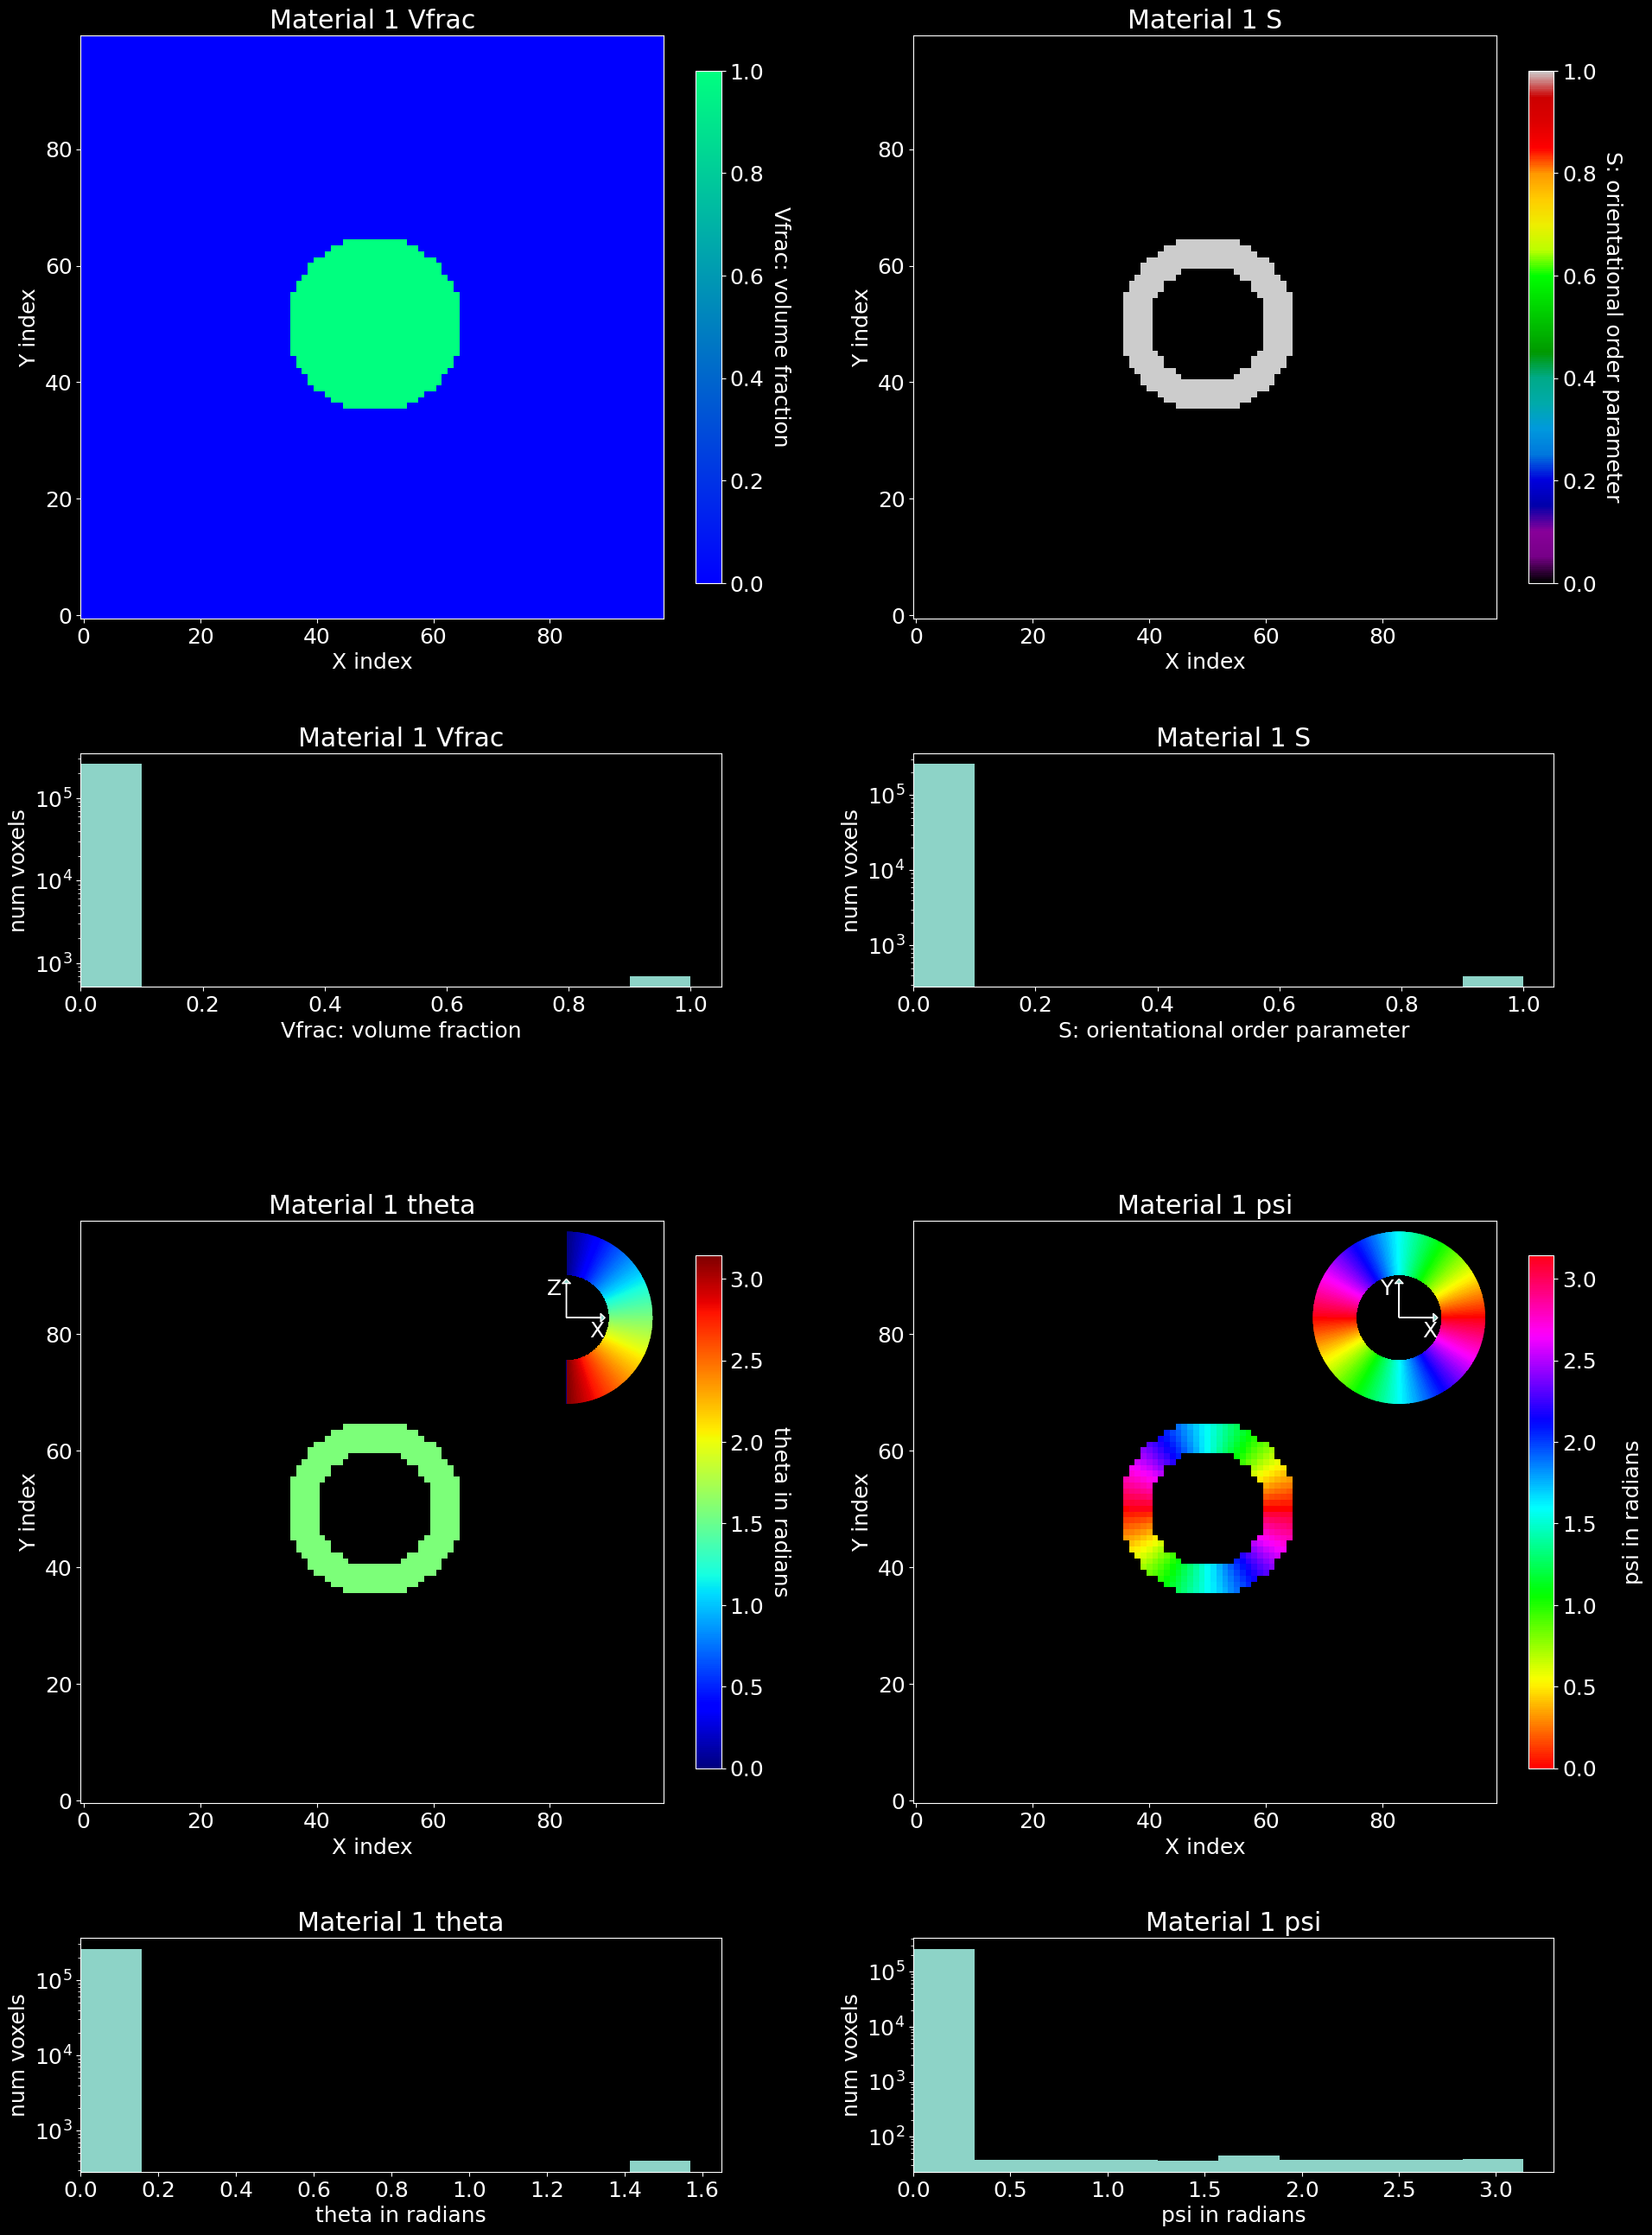

Material 2 Vfrac. Min: 0.0 Max: 1.0
Material 2 S. Min: 0.0 Max: 0.0
Material 2 theta. Min: 0.0 Max: 0.0
Material 2 psi. Min: 0.0 Max: 0.0


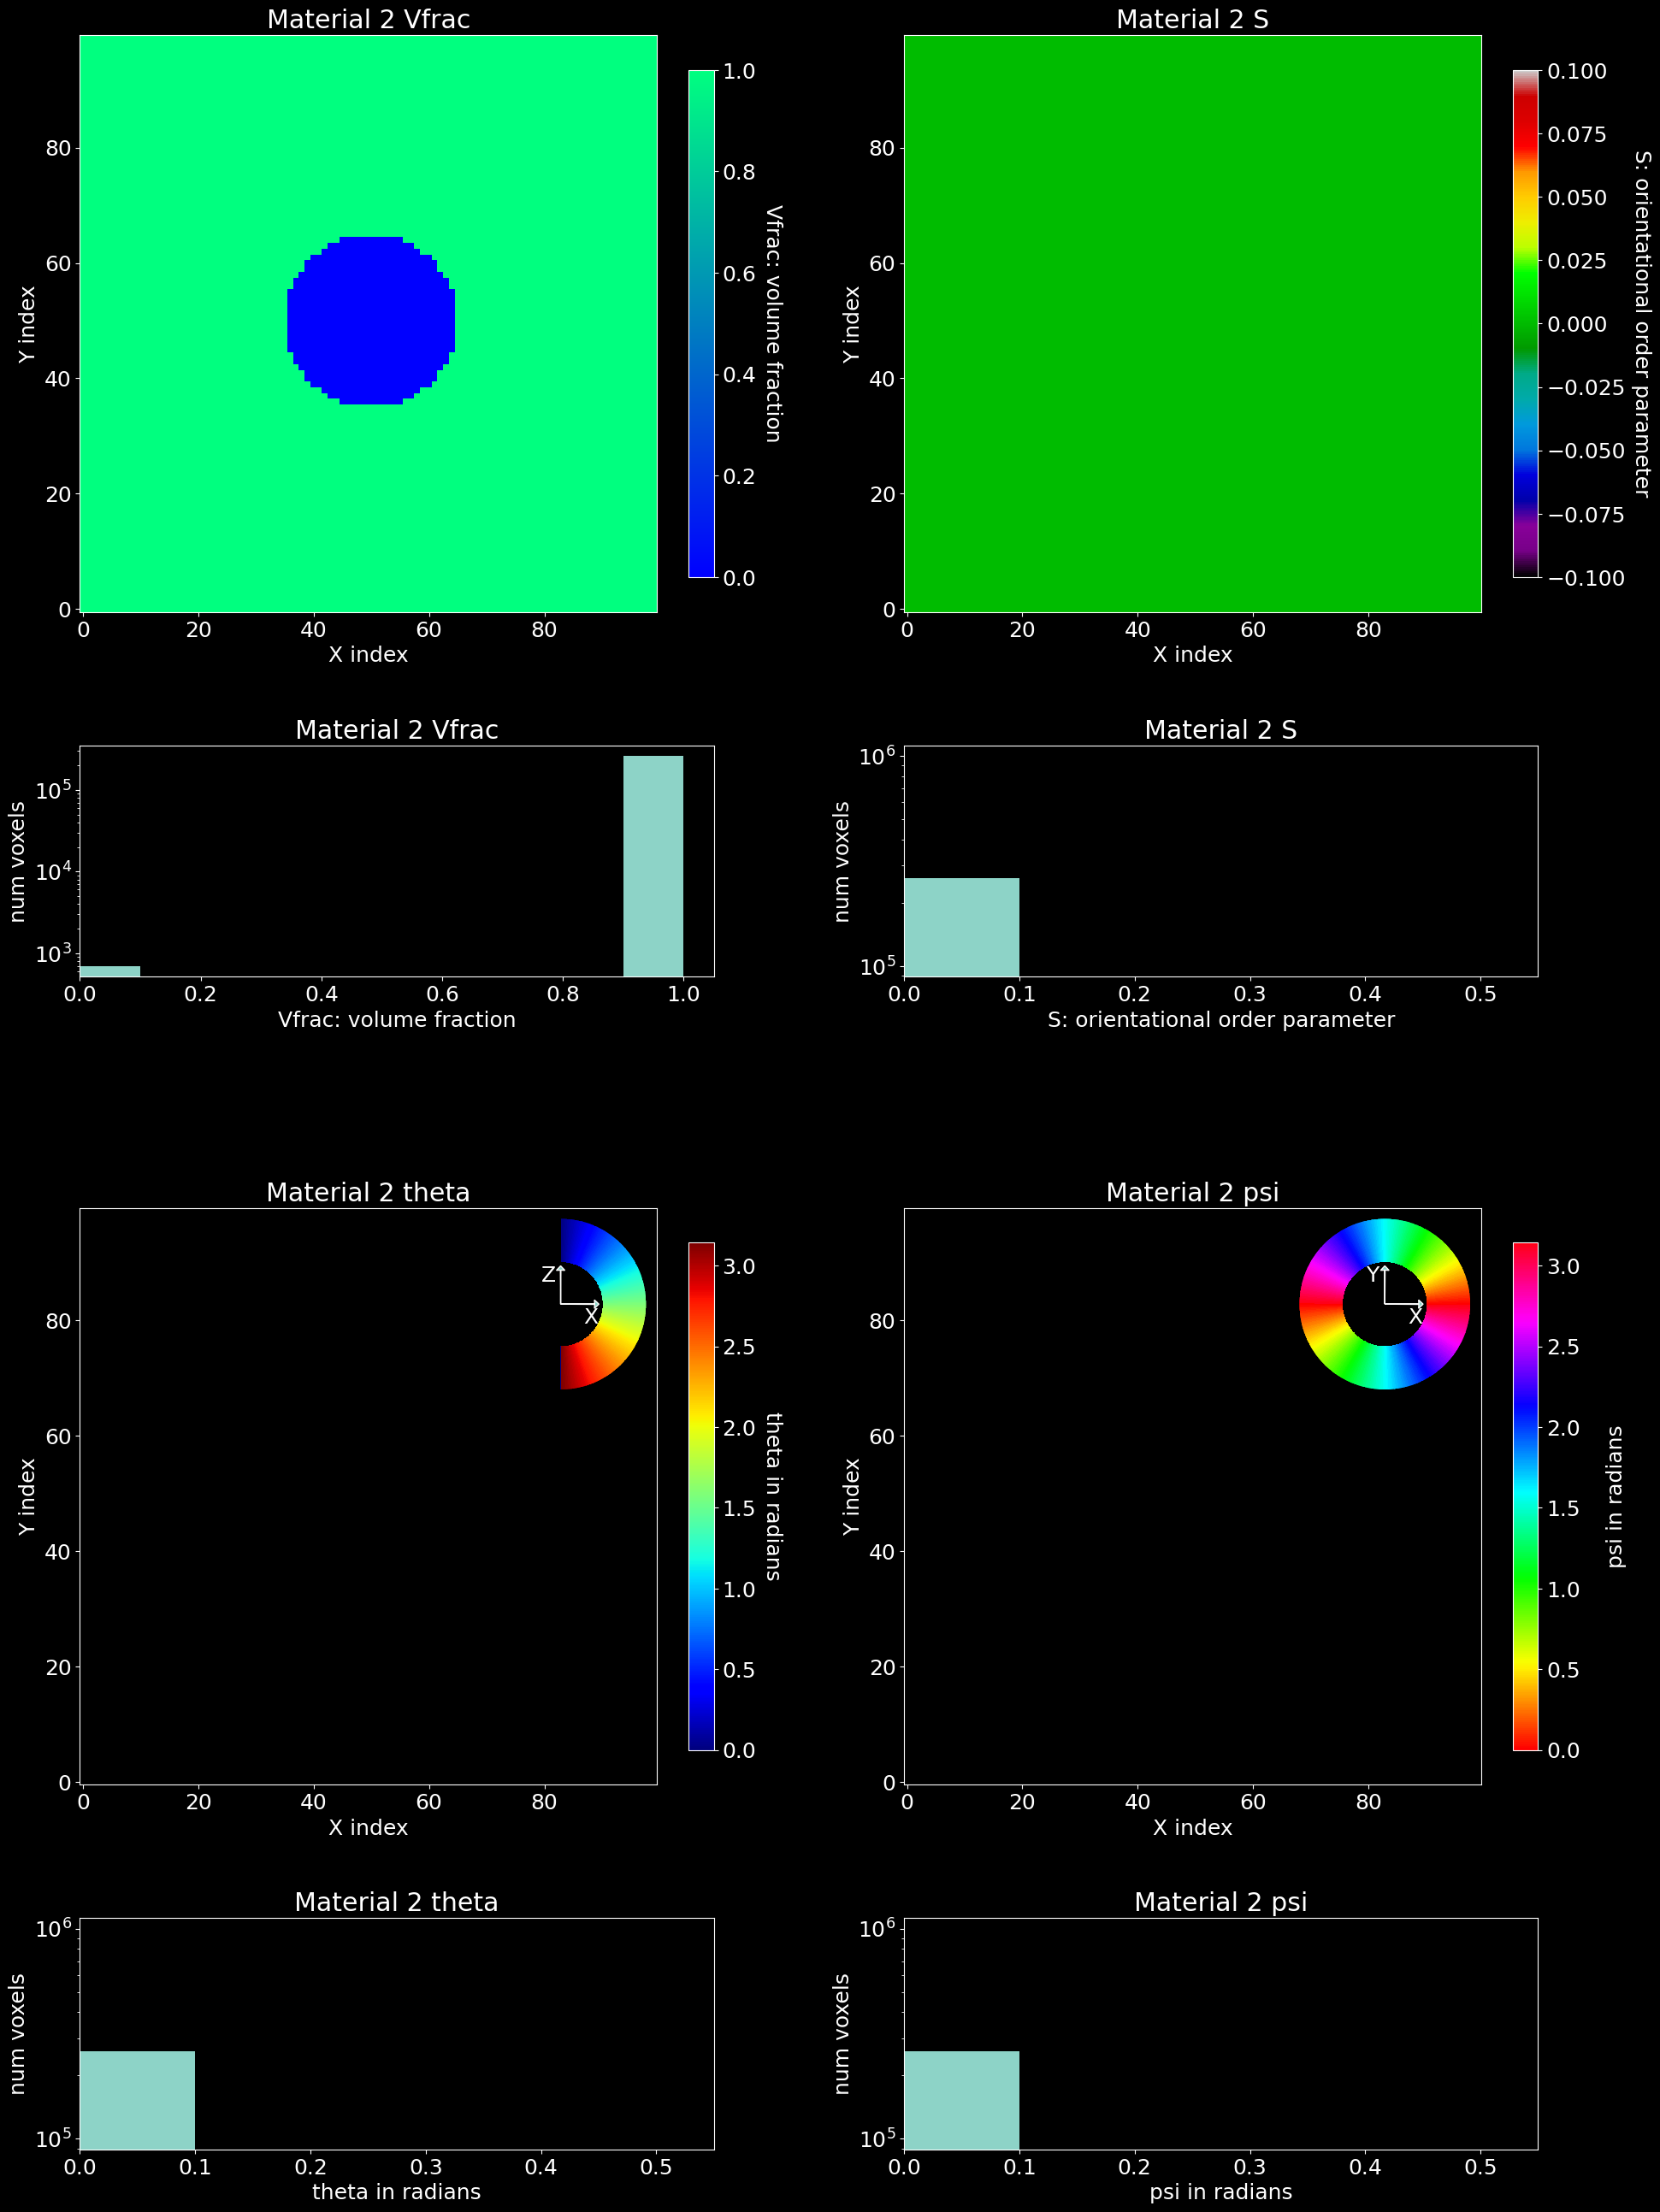

Total Vfrac whole model. Min: 1.0 Max: 1.0
0:00:02.637966


In [27]:
checkH5('CoreShell.hdf5',z_slice=0,subsample=100,plotstyle='dark')

#### The checkh5 function seems to have given our morphology a pass. Now we can run the simulation. This can be accomplished a few different ways:
1. Open a terminal, navigate to where the files are, and run `sbatch job.slurm` or `CyRSoXS CoreShell.hdf5`
2. Use subprocess to submit the command
    - `subprocess.run(["sbatch","job.slurm"])`
    - `subprocess.run(["CyRSoXS", "CoreShell.hdf5"])`
3. Use the python library [simple slurm](https://github.com/amq92/simple_slurm)

In [ ]:
import subprocess
subprocess.run(['CyRSoXS','CoreShell.hdf5'])
# subprocess.run(['sbatch','job.slurm']) # run on glados or wheatley

#### Now that the simulation has been run (you can check on its status from the terminal with the `squeue` command if using slurm), we can read in the simulated data and plot it up in various ways

#### The scattering pattern at each energy is written to a separate HDF5 (.h5) file. We can look at the keys in the file

In [28]:
import h5py
h5path = pathlib.Path(basePath,'HDF5')
h5list = list(sorted(h5path.glob('*h5')))

In [29]:
def print_key(f, key):
    try:
        keys2 = f[key].keys()
        for key2 in keys2:
            new_key = key + '/' + key2
            print_key(f, new_key)
    except AttributeError:
        print(key)

with h5py.File(h5list[0],'r') as f:
    for key in f.keys():
        print_key(f, key)

K0/projection
KIDList/KVec


#### The scattering pattern is contained within 'K0/projection.' If you simulated multiple incident angles there would be additional 'K#' keys. KIDList contains the vector values for each of the incident angles (propagation direction).

In [30]:
from matplotlib import cm
from matplotlib.colors import LogNorm

In [31]:
import sys
sys.path.append('/home/pdudenas/lib/PyHyperScattering/src/')

#### Import the PyHyperScattering loader and integrator

In [32]:
from PyHyperScattering.load import cyrsoxsLoader
from PyHyperScattering.integrate import WPIntegrator

Imports failed.  Are you running on a machine with proper libraries for databroker, tiled, etc.?


/home/pdudenas/mambaforge/envs/nrss/lib/python3.9/site-packages/PyHyperScattering/load.py:1: UserWarning: Could not import astropy.io.fits, needed for ALS 11.0.1.2 RSoXS loading.  Is this dependency installed?
  from PyHyperScattering.ALS11012RSoXSLoader import ALS11012RSoXSLoader
/home/pdudenas/mambaforge/envs/nrss/lib/python3.9/site-packages/PyHyperScattering/integrate.py:3: UserWarning: Could not import CuPy or ndigpu.  If you expect this machine to support CuPy, check dependencies.  Falling back to scikit-image/numpy CPU integration.
  from PyHyperScattering.WPIntegrator import WPIntegrator
/home/pdudenas/mambaforge/envs/nrss/lib/python3.9/site-packages/PyHyperScattering/util.py:4: UserWarning: Could not import package for interactive integration utils.  Install holoviews and scikit-image.
  from PyHyperScattering import IntegrationUtils


In [33]:
load = cyrsoxsLoader()
integ = WPIntegrator(force_np_backend=True) # avoiding gpu backend for this tutorial

In [34]:
raw = load.loadDirectory(basePath)

Finished reading 250 energies. Time required: 0:00:00.214061


In [35]:
remeshed = integ.integrateImageStack(raw)

  0%|          | 0/250 [00:00<?, ?it/s]

In [36]:
c = cm.jet(np.linspace(0,1,len(remeshed)))

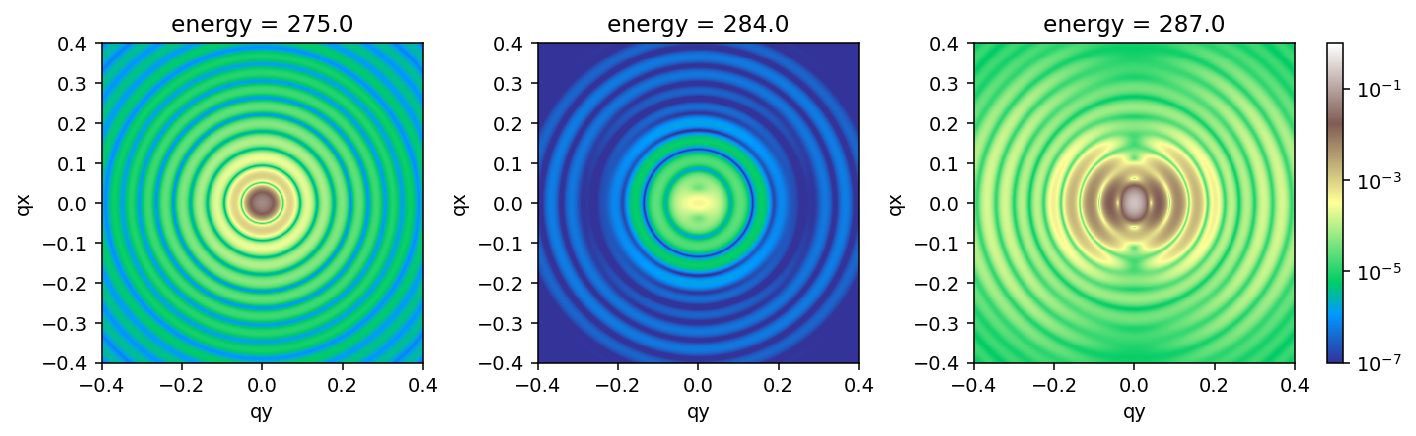

In [39]:
fig, ax = plt.subplots(1,3,figsize=(10,3),dpi=140,constrained_layout=True)
raw.sel(energy=275).plot(norm=LogNorm(1e-7,1),cmap='terrain',ax=ax[0],add_colorbar=False)
raw.sel(energy=284).plot(norm=LogNorm(1e-7,1),cmap='terrain',ax=ax[1],add_colorbar=False)
raw.sel(energy=287).plot(norm=LogNorm(1e-7,1),cmap='terrain',ax=ax[2])

[{axes.set_xlim(-0.4,0.4),axes.set_ylim(-0.4,0.4)} for axes in ax]
plt.show()

In [46]:
# calculate the anisotropy metric
A = remeshed.rsoxs.AR(chi_width=20)

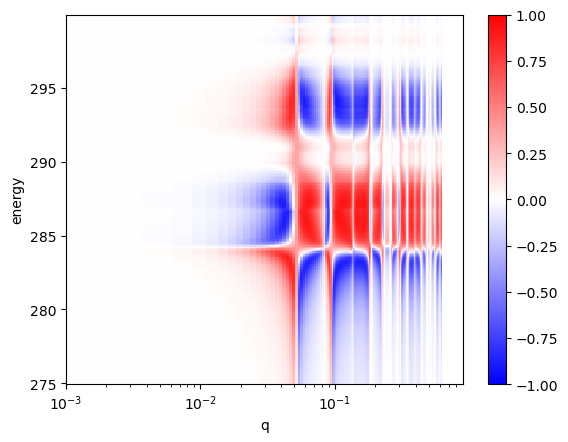

In [47]:
A.plot(x='q',cmap='bwr',vmin=-1,vmax=1)
plt.xlim(1e-3)
plt.xscale('log')
plt.show()

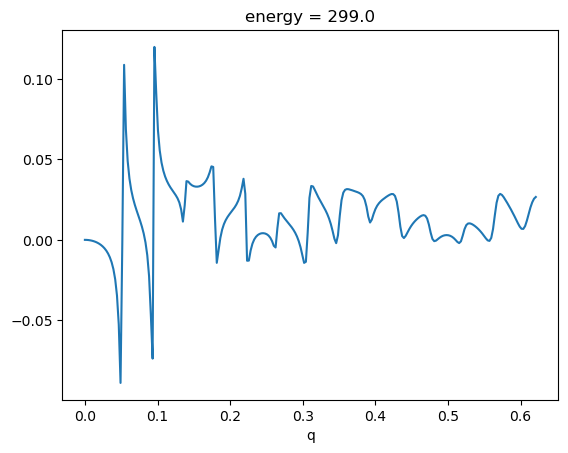

In [48]:
A.sel(energy=299,method='nearest').plot()
plt.show()

In [58]:
horz = remeshed.rsoxs.slice_chi(0, chi_width=20)
vert = remeshed.rsoxs.slice_chi(90, chi_width=20)

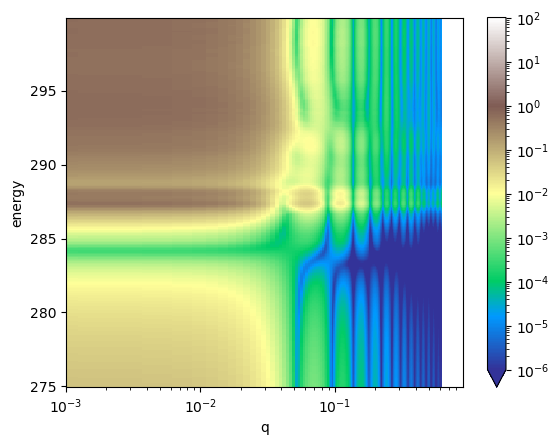

In [60]:
horz.plot(x='q',cmap='terrain',norm=LogNorm(1e-6,1e2))
plt.xlim(1e-3)
plt.xscale('log')
plt.show()

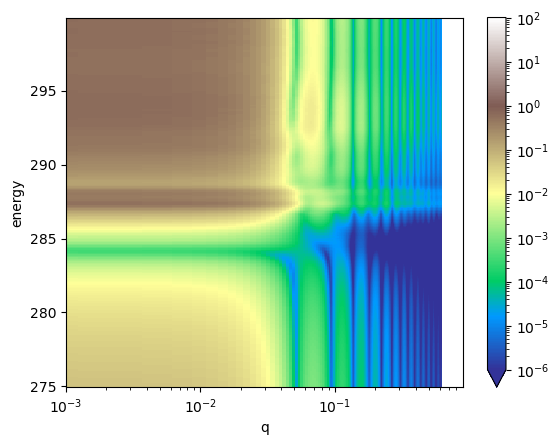

In [61]:
vert.plot(x='q',cmap='terrain',norm=LogNorm(1e-6,1e2))
plt.xlim(1e-3)
plt.xscale('log')
plt.show()

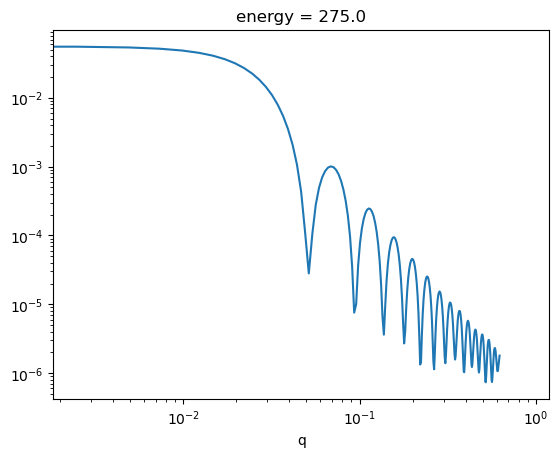

In [63]:
vert.sel(energy=275).plot(yscale='log',xscale='log')
plt.show()

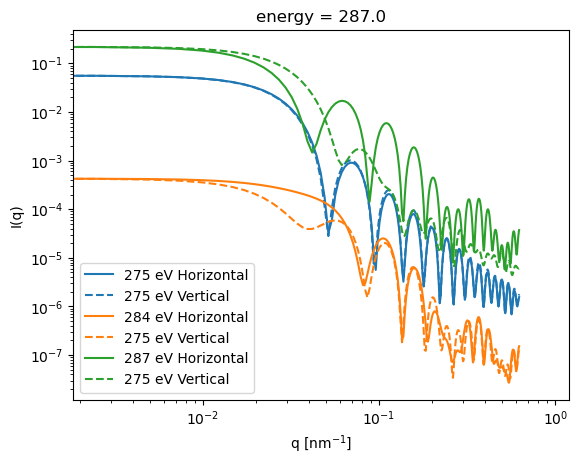

In [64]:
horz.sel(energy=275).plot(xscale='log',yscale='log',label='275 eV Horizontal',color='tab:blue')
vert.sel(energy=275).plot(xscale='log',yscale='log',label='275 eV Vertical',linestyle='--',color='tab:blue')
horz.sel(energy=284,method='nearest').plot(xscale='log',yscale='log',label='284 eV Horizontal',color='tab:orange')
vert.sel(energy=284).plot(xscale='log',yscale='log',label='275 eV Vertical',linestyle='--',color='tab:orange')
horz.sel(energy=287,method='nearest').plot(xscale='log',yscale='log',label='287 eV Horizontal',color='tab:green')
vert.sel(energy=287).plot(xscale='log',yscale='log',label='275 eV Vertical',linestyle='--',color='tab:green')
plt.legend()
plt.xlabel(r'q [nm$^{-1}$]')
plt.ylabel('I(q)')
plt.show()

#### If you want to look at the dielectric functions in the Material#.txt files

In [46]:
def read_material(filename):
    with open(filename,'r') as f:
        lines = f.readlines()
    Energy = []
    betapara = []
    betaperp = []
    deltapara = []
    deltaperp = []
    for line in lines:
        if line.startswith('Energy '):
            split_line = line.split(' = ')
            Energy.append(float(split_line[1].strip(';\n')))
        elif line.startswith('BetaPara'):
            split_line = line.split(' = ')
            betapara.append(float(split_line[1].strip(';\n')))
        elif line.startswith('BetaPerp'):
            split_line = line.split(' = ')
            betaperp.append(float(split_line[1].strip(';\n')))
        elif line.startswith('DeltaPara'):
            split_line = line.split(' = ')
            deltapara.append(float(split_line[1].strip(';\n')))
        elif line.startswith('DeltaPerp'):
            split_line = line.split(' = ')
            deltaperp.append(float(split_line[1].strip(';\n')))
    para = [complex(delta, beta) for delta, beta in zip(deltapara, betapara)]
    perp = [complex(delta, beta) for delta, beta in zip(deltaperp, betaperp)]
    return np.array(Energy), np.array(para), np.array(perp)

In [47]:
energy, para, perp = read_material('Material1.txt')

(-0.0015, 0.0025)

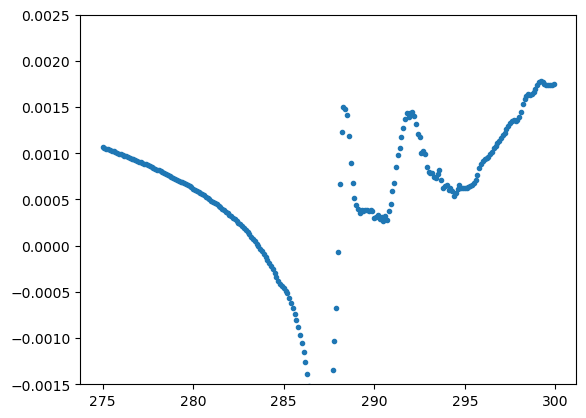

In [48]:
plt.plot(energy,para.real,'.')
plt.ylim(-0.0015,0.0025)

#### Compare to the original file to make sure we've written each Material#.txt file correctly

In [49]:
Data = np.loadtxt('PEOlig2018.txt',skiprows=1);
Data = Data[Data[:,energy_dict["Energy"]].argsort()]

(270.0, 300.0)

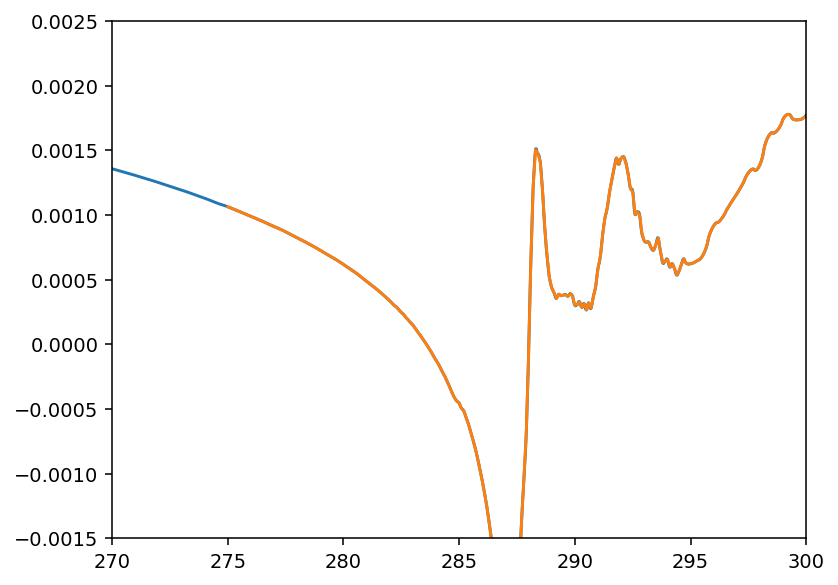

In [50]:
plt.figure(dpi=140)
plt.plot(Data[:,6],Data[:,2])
plt.plot(energy,para.real)
plt.ylim(-0.0015,0.0025)
plt.xlim(270,300)